# Analyze pendulum data
Use this notebook to quickly test whether your pendulum data makes sense!

In [31]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
from iminuit import Minuit, cost
from prompt_toolkit.renderer import HeightIsUnknownError

In [32]:
# Example file location
filename_example = 'data_pendulum_example/timer_output_31meas.dat'

## Data reader

In [33]:
# Read in data
def read_data(filename):
    dat = np.genfromtxt(filename, delimiter='\t', names=('n', 't_s'))
    return dat

## Read and plot the data

Text(0, 0.5, 'Residial time (s)')

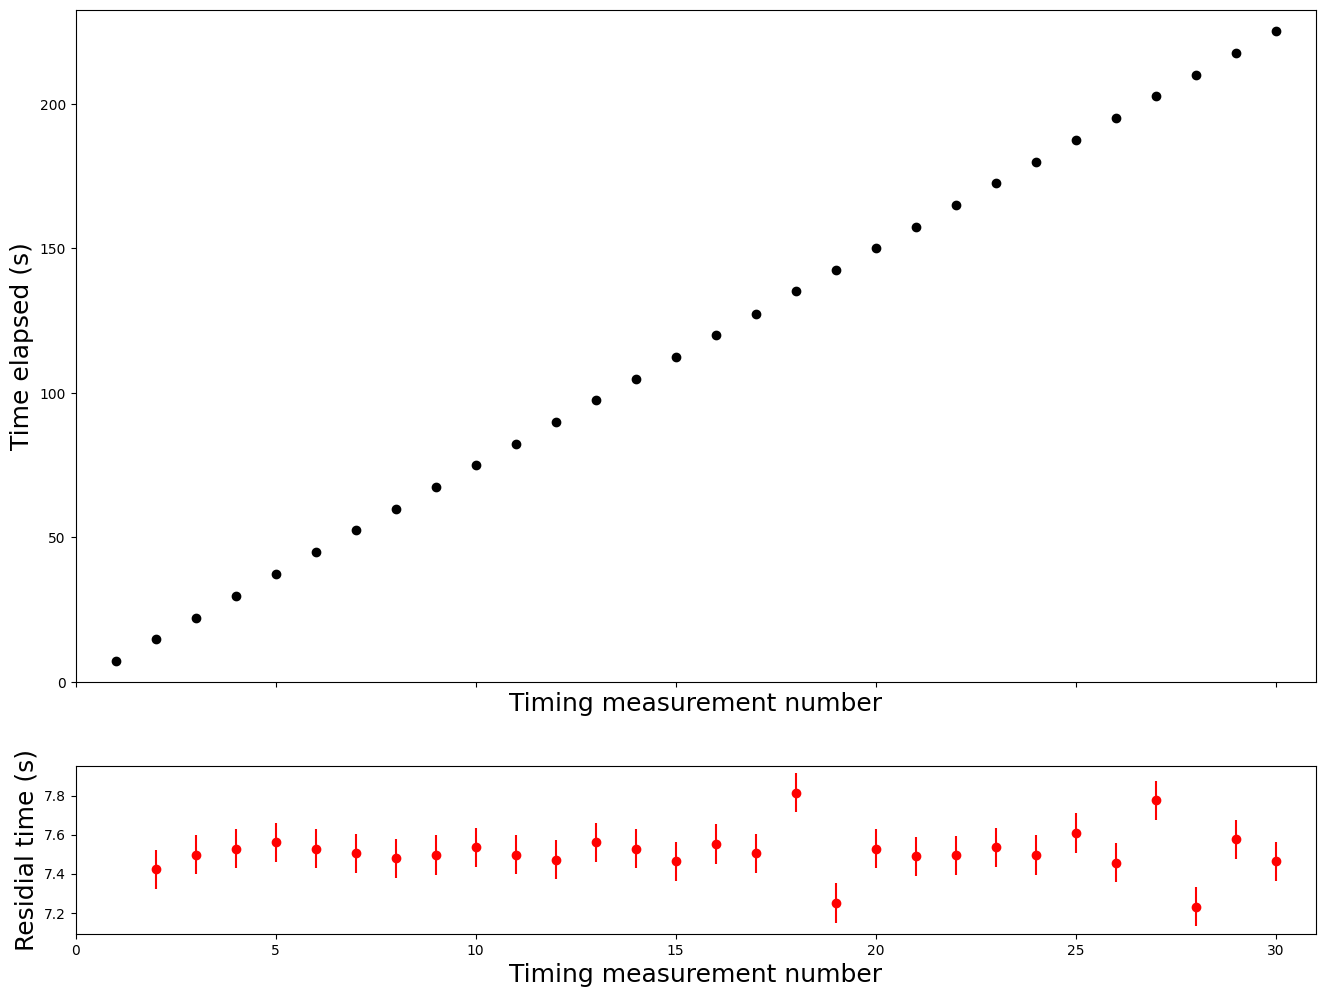

In [36]:
data_example = read_data(filename_example)
n, t = data_example['n'], data_example['t_s']
#finding the resudials
dt = t[1:] - t[:-1]
#adding a zero at the start to make the arrays the same length

def linear(x, m, b):
    return m*x + b
def constant(x,b):
    return b

#fitting a line to the data since we are in low data we use iminuit unbinned likelihood
# m = Minuit(cost.UnbinnedNLL(linear, n, t, error=sig_t), m=1.0, b=0.0)


# Plotting
sig_t = 0.1     # Set your own values...
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(16, 12), gridspec_kw={'height_ratios':[4,1]}, sharex=True)
ax[0].errorbar(n, t, yerr=sig_t, color='k', fmt='o')
ax[0].set_xlabel('Timing measurement number', fontsize=18)
ax[0].set_ylabel('Time elapsed (s)', fontsize=18)
ax[0].set(xlim=(0, n[-1]+np.ediff1d(n)[0]), ylim=(0, t[-1]+np.ediff1d(t)[0]))

ax[1].errorbar(n[1:], dt, yerr=sig_t, color='r', fmt='o')
ax[1].set_xlabel('Timing measurement number', fontsize=18)
ax[1].set_ylabel('Residial time (s)', fontsize=18)


Text(0, 0.5, 'Counts')

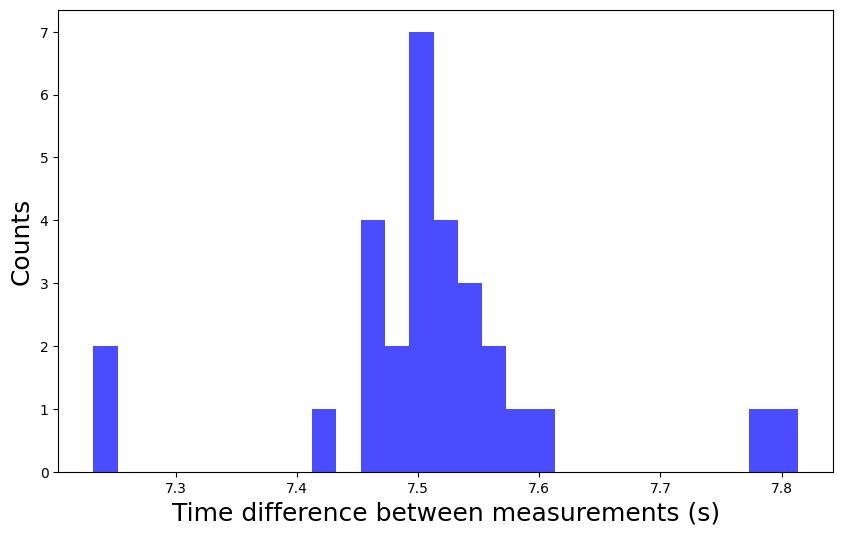

In [29]:
#plotting the time differences as a histogram
fig2, ax2 = plt.subplots(figsize=(10,6))
ax2.hist(dt, bins=np.round(np.floor(len(dt))), color='b', alpha=0.7)
ax2.set_xlabel('Time difference between measurements (s)', fontsize=18)
ax2.set_ylabel('Counts', fontsize=18)


# What to do next?

The reason for the (empty) plot below is, that though your data (hopefully) lies on a line, you're not able to see any smaller effects. However, if you plot the __residuals__ (the difference between your measurements and a fit to them), then you will much better be able to tell, if the data looks good. Also, it is from a historgram of the residuals, that you can determine, if your errors are Gaussian (or have any obvious outliers), and from the Standard Deviation what your (typical) uncertainty is.

In [17]:
#Cleaning the data by removing outliers using chauvenet's criterion
D_ball1 = np.array([10.00])
D_ball2 = np.array([12.71])
D_ball3 = np.array([15.01])

d_rail = 6.04 #mm

Angle = np.array([76.35, 76.05])
h = 22.24
l = 90.07
d = np.array([])

array([  7.2983,  14.7204,  22.2166,  29.7444,  37.3042,  44.8317,
        52.3357,  59.8157,  67.3115,  74.8473,  82.3432,  89.8149,
        97.3748, 104.9026, 112.3665, 119.9183, 127.4223, 135.2358,
       142.4859, 150.0136, 157.5022, 164.9972, 172.533 , 180.0288,
       187.6369, 195.0925, 202.8684, 210.1002, 217.6759])

In [38]:
h_laser_arr = np.array([22.254,22.261,22.259,22.261,22.257])
h_laser = np.mean(h_laser_arr)
h_laser_sig = np.std(h_laser_arr)/np.sqrt(len(h_laser_arr))

print(f'Height measured by laser: {h_laser:.3f} +/- {h_laser_sig:.3f} m')

Height of laser: 22.258 +/- 0.001 m


In [41]:
h_top = 67.49-56
height_weight = 59.05-56
cm_from_floor = h_top - height_weight